In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

MFCC features for C:\IIT-G Internship\ASCII Waves Recording\Used\234101011_a_11(2)-2.wav:
[[-351.00757    -267.04715    -213.45972    -211.7793     -234.43544
  -256.72998    -277.63052    -308.67694    -319.8311     -312.05426   ]
 [ 146.03682     154.03574     145.97983     145.63773     147.69489
   150.95065     150.5588      151.30782     150.57013     126.746704  ]
 [   6.092407    -35.51602     -59.464455    -57.227127    -42.361214
   -29.684784    -19.752018    -12.907835      3.8814592    16.698416  ]
 [ -14.169696      3.638988      8.18647       4.651394     -4.6651945
   -12.31867     -11.24423     -12.123945    -12.138529     -2.1274855 ]
 [ -18.280289    -33.66287     -36.25567     -33.876747    -33.135895
   -33.551727    -30.873142    -24.729717    -17.103405    -10.319367  ]
 [  -9.357389    -13.701714    -15.181549    -14.764006    -11.554573
    -9.762973    -13.44471     -12.12282      -3.6347733    -0.88035524]
 [  -4.485645     -8.859351     -7.415781     -2.7517

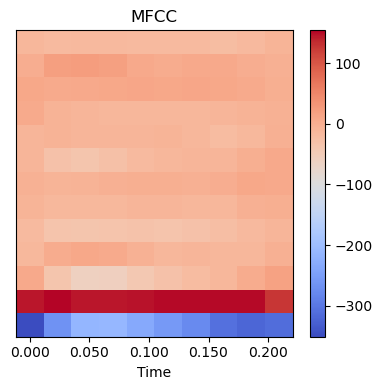

MFCC features for C:\IIT-G Internship\ASCII Waves Recording\Used\234101011_e_10-4.wav:
[[-181.66394    -130.52516    -135.31253    -155.55383    -179.64703
  -215.27823    -250.7267     -290.00143    -323.54022    -354.83057   ]
 [ 121.084656    109.21268      98.38544     107.57034     119.22588
   121.07956     129.7507      131.07277     130.14883     130.9653    ]
 [ -86.94835     -91.757645    -88.11727     -77.68785     -74.905045
   -66.36754     -53.01963     -40.72782     -27.756775    -12.872986  ]
 [  54.10563      46.83529      34.447002     31.470982     31.406414
    20.138264     10.706554     11.020617     17.392914     17.058363  ]
 [ -16.464523    -19.666431    -21.568855    -18.957024    -16.043291
   -17.317417    -18.976555    -18.835724     -6.4380627    -0.41792202]
 [ -31.748924    -30.66806     -33.865395    -38.07168     -39.295765
   -42.02412     -47.828484    -49.105385    -39.4506      -31.790142  ]
 [ -11.257023    -14.310413    -16.88364     -18.076218  

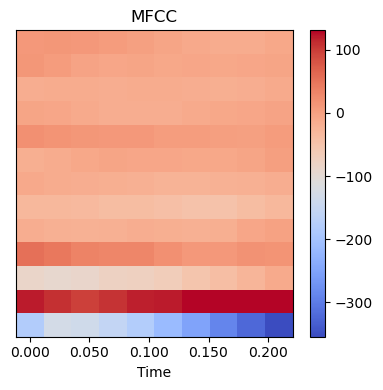

Euclidean distance between column 1 of the first matrix and column 1 of the second matrix: 129.80125427246094
Euclidean distance between column 2 of the first matrix and column 2 of the second matrix: 100.0822982788086
Euclidean distance between column 3 of the first matrix and column 3 of the second matrix: 87.6335220336914
Euclidean distance between column 4 of the first matrix and column 4 of the second matrix: 80.73468780517578
Euclidean distance between column 5 of the first matrix and column 5 of the second matrix: 79.98247528076172
Euclidean distance between column 6 of the first matrix and column 6 of the second matrix: 79.27765655517578
Euclidean distance between column 7 of the first matrix and column 7 of the second matrix: 71.57699584960938
Euclidean distance between column 8 of the first matrix and column 8 of the second matrix: 73.32635498046875
Euclidean distance between column 9 of the first matrix and column 9 of the second matrix: 72.99332427978516
Euclidean distance 

In [2]:
def extract_mfcc(audio_file,sr=None, n_mfcc=13):
    """
    Extract MFCC features from an audio file.
    
    Parameters:
    - audio_file: path to the audio file
    - n_mfcc: number of MFCC features to extract
    
    Returns:
    - mfcc: numpy array containing the MFCC features
    """
    try:
        y, sr = librosa.load(audio_file, sr=sr)  # Load audio file
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)  # Extract MFCC features
        return mfcc
    except FileNotFoundError:
        print(f"Audio file not found: {audio_file}")
        return None

def plot_mfcc(mfcc):
    """
    Plot the MFCC features.
    
    Parameters:
    - mfcc: numpy array containing the MFCC features
    """
    plt.figure(figsize=(4, 4))
    librosa.display.specshow(mfcc, x_axis='time')
    plt.colorbar()
    plt.title('MFCC')
    plt.tight_layout()
    plt.show()

def calculate_euclidean_distance(column1, column2):
    """
    Calculate the Euclidean distance between two columns.
    
    Parameters:
    - column1: first numpy array column
    - column2: second numpy array column
    
    Returns:
    - distance: Euclidean distance between the columns
    """
    return np.linalg.norm(column1 - column2)

# Example usage:
audio_files = ['C:\\IIT-G Internship\\ASCII Waves Recording\\Used\\234101011_a_11(2)-2.wav', 'C:\\IIT-G Internship\\ASCII Waves Recording\\Used\\234101011_e_10-4.wav']  # Replace with actual paths to your audio files

mfcc_matrices = []

for audio_file in audio_files:
    mfcc = extract_mfcc(audio_file)
    if mfcc is not None:
        print(f"MFCC features for {audio_file}:")
        print(mfcc)  # This will print the MFCC matrix
        plot_mfcc(mfcc)
        mfcc_matrices.append(mfcc)  # Append the first column of the MFCC matrix

if len(mfcc_matrices) == 2:
    for i in range(min(mfcc_matrices[0].shape[1], mfcc_matrices[1].shape[1])):
        column1 = mfcc_matrices[0][1:, i]  # Exclude the first element
        column2 = mfcc_matrices[1][1:, i]  # Exclude the first element
        distance = calculate_euclidean_distance(column1, column2)
        print(f"Euclidean distance between column {i+1} of the first matrix and column {i+1} of the second matrix: {distance}")
else:
    print("Failed to extract MFCC features.")